In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors

In [252]:
df = pd.read_excel('COH plasma data.xlsx')
X = np.array(df.iloc[16:, 8:]).transpose()
y = np.array(df.iloc[15, 8:]).transpose()
y = y.astype('int')
pd.DataFrame(X).fillna(0, inplace=True)

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [254]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.6, c=cmap(idx), edgecolor='black', marker=markers[idx], label=cl)

In [255]:
# forest = RandomForestClassifier(n_estimators=500, random_state=1)
# forest.fit(X_train_std, y_train)
# feat_labels = np.array(df.iloc[16:, 2]).transpose()
# importances = forest.feature_importances_
# indices = np.argsort(importances)[::-1]
# for f in range(X_train.shape[1]):
#     print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

# plt.title('Feature Importance')
# plt.bar(range(X_train_std.shape[1]), importances[indices], align='center')
# plt.xticks(range(X_train_std.shape[1]), feat_labels, rotation=90)
# plt.xlim([-1, X_train_std.shape[1]])
# plt.tight_layout()
# plt.show()

In [256]:
# fig = plt.figure(figsize=(12, 8))
# ax = fig.add_subplot(111, projection='3d')
# oxoproline = list(df.iloc[18, 8:])
# aspartate = list(df.iloc[20, 8:])
# glycerol = list(df.iloc[21, 8:])
# ax.scatter(oxoproline, aspartate, glycerol, c='r', marker='o')
# ax.set_xlabel('5-Oxoproline')
# ax.set_ylabel('Aspartate')
# ax.set_zlabel('Glycerolphosphate')
# ax.title.set_text('Important features 3D plot')
# plt.savefig('3d.png', dpi=300, bbox_inches='tight')
# plt.show()

In [257]:
# pca = PCA(n_components=2)
# lr = LogisticRegression()
# X_train_pca = pca.fit_transform(X_train_std)
# X_test_pca = pca.transform(X_test_std)
# lr.fit(X_train_pca, y_train)
# plot_decision_regions(X_train_pca, y_train, classifier=lr)
# plt.xlabel('PC 1')
# plt.ylabel('PC 2')
# # plt.title('PCA Dimensionality Reduction 2D using Logistic Regression')
# plt.legend(loc='lower left')
# plt.savefig('pca2d_lr.png', dpi=300, bbox_inches='tight')
# plt.show()

In [258]:
# kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
# X_kpca = kpca.fit_transform(X)
# plt.scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', marker='^', alpha=0.5, label='Patient')
# plt.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', marker='o', alpha=0.5, label='Healthy')
# plt.xlabel('PC 1')
# plt.ylabel('PC 2')
# plt.title('PCA dimensionality Reduction using KernelPCA (kernel=rbf)')
# plt.legend()
# # plt.savefig('kernelpca', dpi=300, bbox_inches='tight')
# plt.show()

In [259]:
# km = KMeans(n_clusters=2, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
# y_km = km.fit_predict(X)
# plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='cluster 1')
# plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='cluster 2')
# plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='black', label='centroids')
# plt.legend(scatterpoints=1)
# plt.grid()
# plt.title('KMeans Clustering Analysis of Dataset')
# # plt.savefig('kmeans clustering', dpi=300, bbox_inches='tight')
# plt.show()

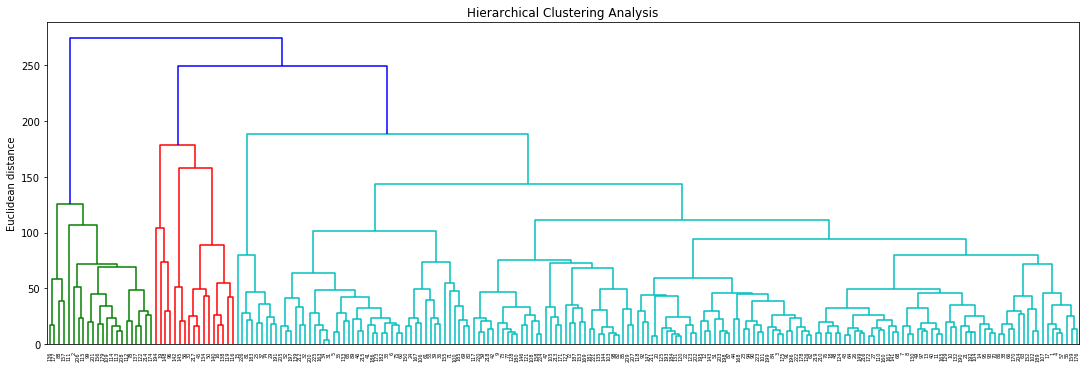

In [260]:
fig = plt.figure(figsize=(15, 5))
features = np.array(df.iloc[16: , 2])
patients = np.array(df.columns[8:])
df = pd.DataFrame(X, columns=features, index=patients)
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')), columns=patients, index=patients)
row_clusters = linkage(df.values, method='complete', metric='euclidean')
row_dendr = dendrogram(row_clusters, labels=labels, 
                       # make dendrogram black (part 2/2) 
                       # color_threshold=np.inf
                      )
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.title('Hierarchical Clustering Analysis')
plt.savefig('dendrogram', dpi=300, bbox_inches='tight')
plt.show()